# Importamos librerías

In [1]:
import re

In [2]:
texto = "esto es un #hasthag12"

In [3]:
re.sub('[^a-zA-z\s]', "", texto)

'esto es un hasthag'

In [4]:
import pandas as pd

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus

El corpus es s1:s3 y se mantiene el orden.

In [6]:
s1 = "me gustan los perros"
s2 = "hay perros y perros"
s3 = "hay muchas razas de perros"

In [7]:
corpus = [s1, s2, s3]

In [8]:
corpus

['me gustan los perros', 'hay perros y perros', 'hay muchas razas de perros']

In [9]:
vec = CountVectorizer()

In [10]:
X = vec.fit_transform(corpus)

In [11]:
X

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [12]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 2, 0],
       [1, 0, 1, 0, 0, 1, 1, 1]])

In [13]:
print(vec.get_feature_names_out()) #todas las palabras de mi corpus

['de' 'gustan' 'hay' 'los' 'me' 'muchas' 'perros' 'razas']


In [14]:
matrix = pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

In [15]:
matrix

,de,gustan,hay,los,me,muchas,perros,razas
0,0,1,0,1,1,0,1,0
1,0,0,1,0,0,0,2,0
2,1,0,1,0,0,1,1,1


# Ejemplo práctico

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df = pd.read_json('/content/drive/MyDrive/Classroom/Minería de Datos I 73607-2024-1C-Datos-División B-Día miércoles/Clase 9/Sarcasm_Headlines_Dataset.json', lines = True)

Recuerden que esto es un analisis SEMÁNTICO

In [20]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


# Fase de exploración

In [21]:
df.shape

(28619, 3)

In [22]:
df.shape[0]

28619

In [23]:
index_random = np.random.randint(0, df.shape[0])

In [24]:
titular = df.iloc[index_random]

In [25]:
titular

is_sarcastic                                                    1
headline                    parking-ramp attendant moves slightly
article_link    https://www.theonion.com/parking-ramp-attendan...
Name: 4545, dtype: object

In [26]:
type(titular.headline)

str

# Tokenización

Aprenderemos a utilizar los distintos métodos

In [27]:
titular_st = nltk.sent_tokenize(titular.headline)

In [28]:
titular_st

['parking-ramp attendant moves slightly']

In [29]:
titular_word = nltk.word_tokenize(titular.headline)

In [30]:
titular_word

['parking-ramp', 'attendant', 'moves', 'slightly']

In [31]:
stopwords = nltk.corpus.stopwords.words('english') #vienen por default

In [ ]:
stopwords

Una vez que tenemos las palabras tokenizadas o separadas, eliminamos todas aquellas que pertenzcan a "stopwords", que son aquellas que no le sirven a nuestro analisis.

In [33]:
titular_sw = [word for word in titular_word if word not in stopwords]

In [34]:
titular_sw

['parking-ramp', 'attendant', 'moves', 'slightly']

In [35]:
freq = nltk.FreqDist(titular_sw)

In [36]:
freq

FreqDist({'parking-ramp': 1, 'attendant': 1, 'moves': 1, 'slightly': 1})

# Preprocesamiento del dataset

# Df no sarcasmo

In [37]:
df_no_sarcasmo = df[df.is_sarcastic == 0]

In [38]:
df_no_sarcasmo

,is_sarcastic,headline,article_link
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...
...,...,...,...
28607,0,what our grieving family needs from loved ones...,https://www.huffingtonpost.com/entry/what-our-...
28608,0,stephen colbert attempts to list everything tr...,https://www.huffingtonpost.com/entry/stephen-c...
28609,0,bakery owner vows to stop making wedding cakes...,https://www.huffingtonpost.com/entry/jack-phil...
28613,0,how san antonio's dominant defense is fueling ...,https://www.huffingtonpost.com/entry/san-anton...


In [39]:
df_no_sarcasmo.shape[0]

14985

In [40]:
todos_titulares_no_sarcasmo = [] #lista con todos los titulares
for i in range(df_no_sarcasmo.shape[0]):
  titular = df_no_sarcasmo.iloc[i].headline
  titular = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(titular)
  titular = [word for word in titular if word not in stopwords]

  todos_titulares_no_sarcasmo.append(titular)


In [ ]:
todos_titulares_no_sarcasmo

In [42]:
import itertools

In [43]:
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))

In [ ]:
todos_titulares_no_sarcasmo

In [45]:
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)

In [46]:
type(freq_no_sarcasmo)

nltk.probability.FreqDist

In [47]:
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ['Words', 'Freq'])

In [48]:
df_no_sarcasmo

,Words,Freq
0,dem,4
1,rep,23
2,totally,23
3,nails,10
4,congress,71
...,...,...
17331,venetian,1
17332,conducting,1
17333,pokémon,1
17334,altogether,1


In [49]:
df_no_sarcasmo.sort_values('Freq', ascending = False, inplace = True)

In [50]:
df_no_sarcasmo

,Words,Freq
61,trump,1446
99,new,680
225,donald,458
562,says,349
897,women,317
...,...,...
10518,aftershocks,1
10517,encrypted,1
10514,professes,1
10512,profession,1


In [51]:
df_no_sarcasmo = df_no_sarcasmo.reset_index()

In [52]:
df_no_sarcasmo.head(100)

,index,Words,Freq
0,61,trump,1446
1,99,new,680
2,225,donald,458
3,562,says,349
4,897,women,317
...,...,...,...
95,253,gun,95
96,38,sex,95
97,1573,good,93
98,1000,john,93


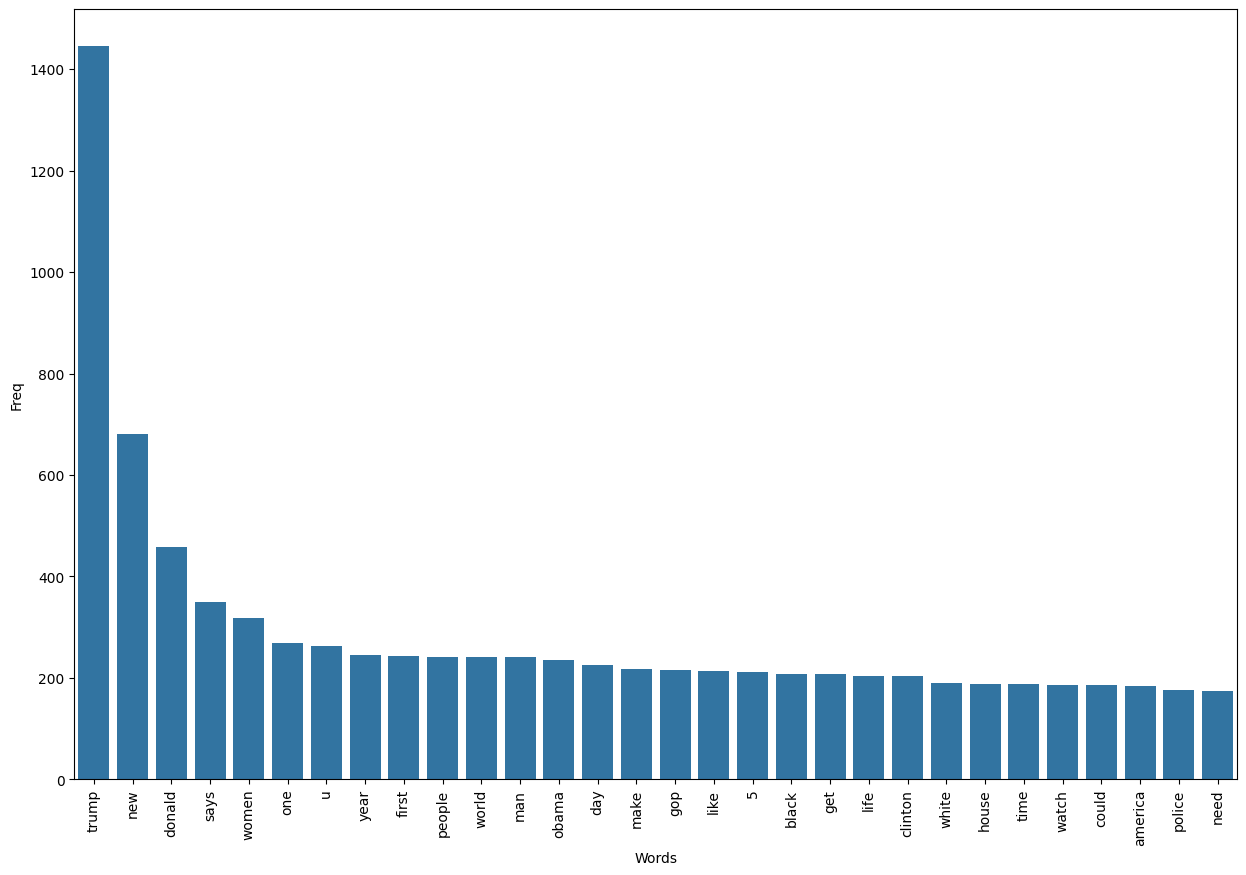

In [53]:
plt.figure(figsize = (15,10))
plot = sns.barplot(x = df_no_sarcasmo.iloc[:30].Words, y =df_no_sarcasmo.iloc[:30].Freq)
for f in plot.get_xticklabels():
  f.set_rotation(90)

plt.show()

# Df Sarcasmo

In [54]:
df_sarcasmo = df[df.is_sarcastic == 1]

In [55]:
todos_titulares_sarcasmo = []
for i in range(df_sarcasmo.shape[0]):
  titular = df_sarcasmo.iloc[i].headline
  titular = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(titular)
  titular = [word for word in titular if word not in stopwords]

  todos_titulares_sarcasmo.append(titular)

In [56]:
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))

In [57]:
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)

In [58]:
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ['Words', 'Freq'])

In [59]:
df_sarcasmo.sort_values('Freq', ascending = False, inplace = True)

In [60]:
df_sarcasmo = df_sarcasmo.reset_index()

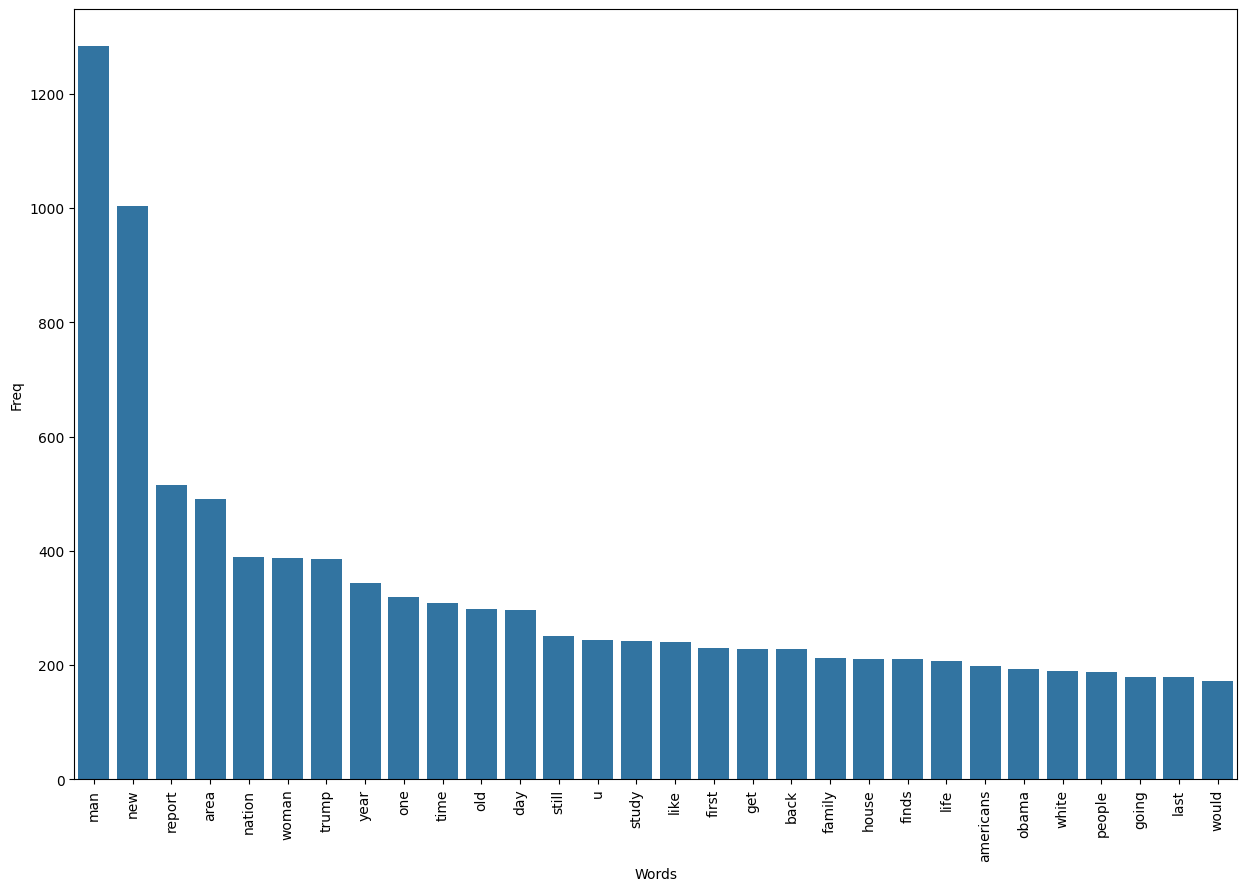

In [61]:
plt.figure(figsize = (15,10))
plot = sns.barplot(x = df_sarcasmo.iloc[:30].Words, y = df_sarcasmo.iloc[:30].Freq)
for f in plot.get_xticklabels():
  f.set_rotation(90)

plt.show()

# Stemming

Cargamos el dataset y concatenamos

In [62]:
dataset = pd.read_json('/content/drive/MyDrive/Mineria de datos I/Clase 8/Sarcasm_Headlines_Dataset.json', lines = True)

In [63]:
dataset = pd.concat([dataset.headline, dataset.is_sarcastic], axis = 1)

In [65]:
dataset

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1
...,...,...
28614,jews to celebrate rosh hashasha or something,1
28615,internal affairs investigator disappointed con...,1
28616,the most beautiful acceptance speech this week...,0
28617,mars probe destroyed by orbiting spielberg-gat...,1


Importamos expresiones regulares y libreria para stemmizar

In [66]:
import re
from nltk.stem import PorterStemmer

Instanciamos

In [67]:
stemmer = PorterStemmer()

Guardamos las stopwords que queremos eliminar en esta variable stopwords

In [68]:
stopwords = nltk.corpus.stopwords.words('english')

Ahora normalizamos, al igual que antes, todos los titulares en una lista

In [69]:
titular_list = [] #lista
for titular in dataset.headline:
  titular = re.sub("[^a-zA-Z]", " ", str(titular)) #todo lo que sea a-zA-Z y lo sustituimos por nada. podemos poner ?! y los mantenemos
  titular = titular.lower()
  titular = nltk.word_tokenize(titular)
  #hay palabras como "u", que lo toma como palabra, asi que eliminamos lo que longitud sea menor a 3
  titular = [palabra for palabra in titular if len(palabra) > 3] #aca podria ser >=, no necesariamente mayor porque hay palabras de 3
  titular = [palabra for palabra in titular if not palabra in stopwords]
  titular = " ".join(titular) #asi se combinan todas las cadenas
  titular_list.append(titular)
  #todo esto fue fase de normalización

In [ ]:
titular_list

Creamos una nueva columna llamada "titular_stem" que va a tener estos datos

In [71]:
dataset['titular_stem'] = titular_list #cambiamos nombre, se tokenizo, limpio stopwords y minusculas

In [72]:
dataset

,headline,is_sarcastic,titular_stem
0,thirtysomething scientists unveil doomsday clo...,1,thirtysomething scientists unveil doomsday clo...
1,dem rep. totally nails why congress is falling...,0,totally nails congress falling short gender ra...
2,eat your veggies: 9 deliciously different recipes,0,veggies deliciously different recipes
3,inclement weather prevents liar from getting t...,1,inclement weather prevents liar getting work
4,mother comes pretty close to using word 'strea...,1,mother comes pretty close using word streaming...
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,jews celebrate rosh hashasha something
28615,internal affairs investigator disappointed con...,1,internal affairs investigator disappointed con...
28616,the most beautiful acceptance speech this week...,0,beautiful acceptance speech week came queer ko...
28617,mars probe destroyed by orbiting spielberg-gat...,1,mars probe destroyed orbiting spielberg gates ...


Creamos un dataset_stem:

In [73]:
dataset_stem = pd.concat([dataset.titular_stem, dataset.is_sarcastic], axis = 1)

In [74]:
dataset_stem

,titular_stem,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,totally nails congress falling short gender ra...,0
2,veggies deliciously different recipes,0
3,inclement weather prevents liar getting work,1
4,mother comes pretty close using word streaming...,1
...,...,...
28614,jews celebrate rosh hashasha something,1
28615,internal affairs investigator disappointed con...,1
28616,beautiful acceptance speech week came queer ko...,0
28617,mars probe destroyed orbiting spielberg gates ...,1


# Lematizar

Liberia para lematizar:

In [75]:
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

In [76]:
frase = dataset_stem.titular_stem[40]

In [77]:
frase

'best clothes child life'

Como nltk es libreria muy pesada vamos descargando cosa por cosa

Recuerdan que para lematizar pasabamos de: "Am Are Was Were" a "Be"? Eso se baja en las siguientes librerias:

In [78]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [79]:
word_lem.lemmatize(frase) #como son palabras muy especificas, por eso no hace nada

'best clothes child life'

In [80]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [81]:
from nltk.corpus import wordnet

Esta forma de hacerlo esta en la pagina de wordnet, fue practicamente copiar y pegar. Es para decirle si es ADJ, NOUN, VERB, ADV.

In [82]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper() #esto nos devuelve algo, queremos usar el de la posicion 0 y 1
    # word, posicion, number, lemma. 0, 1 y 0.
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [83]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Recordatorio: Tokenizar antes de lematizar y luego reconstruir la frase lematizada usando el join de strings.

Ahora lo hacemos tokenizando y lematizando y guardando todo en una lista, al igual que antes

In [84]:
lista_frases_tok_lem = []
for titular in dataset.titular_stem:
  titular_tok = nltk.word_tokenize(titular)
  frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular_tok] #así aparece en la documentación en Wordnet
  tipo_palabra = [get_wordnet_pos(w) for w in titular_tok]
  frase_lemma = " ".join(frase_lemma)
  lista_frases_tok_lem.append(frase_lemma)

In [85]:
dataset["titular_lemm"] = titular_list

Ahora vemos nuestro dataset lemm

In [86]:
dataset_lemm = pd.concat([dataset.titular_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,totally nails congress falling short gender ra...,0
2,veggies deliciously different recipes,0
3,inclement weather prevents liar getting work,1
4,mother comes pretty close using word streaming...,1


Pasamos todos los titulos a una lista

In [87]:
lista_titulos = list(dataset_lemm['titular_lemm'].values)

In [88]:
is_sarcas = dataset_lemm['is_sarcastic'].values

In [ ]:
lista_titulos

Ahora extraemos 1000 palabras y las guardamos en una lista

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
max_features = 1000

In [92]:
coun_vec = CountVectorizer(max_features = max_features)

In [93]:
matriz_titulos = coun_vec.fit_transform(lista_titulos)

In [94]:
all_words = coun_vec.get_feature_names_out()

In [101]:
len(all_words)

1000

In [ ]:
all_words

Separamos en X e Y, siendo Y la variable dependiente que vamos a clasificar. Se trata de un problema de aprendizaje SUPERVISADO.

In [96]:
X = matriz_titulos.toarray()
y = is_sarcas

In [97]:
from sklearn.model_selection import train_test_split

stratify = y lo utilizamos para que queden balanceados en 0 y 1.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

El accuracy del modelo es bastante bajo. La idea es que busquen mejorarlo con otro modelo y seteando otros hiperparámetros como hicimos en el parcial anterior.

In [100]:
rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(X_train, y_train)
print("accuracy: ", rf.score(X_test, y_test))

accuracy:  0.7009084556254368
